In [84]:
import pandas as pd
import numpy as np

In [85]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud

In [87]:
# 정규표현식
import re

In [88]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [89]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-07 12:44:45.513087


'2025-01-07'

In [90]:
df = pd.read_csv(f'../stock/news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수,제목_명사,내용_명사
0,매일경제,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓","\n 사진 확대 삼성SDI 기흥사업장. [사진 = 삼성SDI] DS투자증권은 7일 삼성SDI에 대해 지난해 4분기 일회성 비용이 반영되면서 영업손실이 예상된다며 목표주가를 기존 52만원에서 39만원으로 하향 조정했다. 다만 투자의견은 ‘매수’를 유지했다.삼성SDI의 4분기 영업손실은 233억원으로 전년동기대비 적자전환하며 컨센서스(증권사 전망치 평균)를 하회할 것으로 전망했다. 같은 기간 매출액은 31.8% 감소한 3조8000억원으로 추정했다.중대형전지는 주요 고객사 부진으로 전분기 수준의 드론·친환경차(xEV) 출하량이 예상된다고 설명했다. 에너지저장장치(ESS) 호조는 지속돼 중대형전지 출하량 성장을 견인할 것으로 봤다. 소형전지는 리비안 물량 부재 외에도 전동공구와 IT향도 부진하며 출하량이 감소할 것으로 예상했다.여기에 일회성 비용 인식으로 중대형전지를 중심으로 마진율을 하향했다는 설명이다. 일회성 비용은 재고평가손실과 품질충당보증금 설정 등에 따라 약 1000억원 발생할 것으로 전망했다.삼성SDI의 고객사인 리비안이 올해 미국 인플레이션감축법(IRA) 보조금 대상 차종에서 제외된 점도 부담 요인으로 꼽았다. 3750달러 보조금의 부재는 리비안의 가격 경쟁력에 큰 부담이 될 전망이다. 원통형 전지 주 고객사가 리비안인 점을 감안하면 소형전지 출하량 회복이 지연될 수밖에 없다고 짚었다.최태용 DS투자증권 연구원은 “소형전지 중심으로 가동률 회복이 지연된 점을 반영해 실적 추정치를 하향했다”며 “트럼프 대통령 당선으로 업황 위축이 가시화하고 있다”고 말했다.최 연구원은 “첨단제조생산세액공제(AMPC)를 포함한 IRA 보조금 폐지 가능성은 불확실하지만, 예산 감축을 위한 보조금 축소는 예상 가능한 범위”라며 “전방 시장 둔화는 불가피하나 경쟁사 대비 AMPC 의존도가 낮은 점은 오히려 장점으로 부각될 수 있다”고 덧붙였다.\n",2025-01-07 08:25:11,36,932,7,185,삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,사진 확대 삼성 기흥 사업 사진 삼성 투자 증권 삼성 대해 지난해 회 비용 반영 영업 손실 예상 목표 주가 기존 하향 조정 다만 투자 의견 매수 를 유지 삼성 의 영업 손실 년 대비 컨센서스 증권사 망치 평균 를 회 것 전망 기간 매출 액 감소 추정 중대 전지 주요 고객 사 부진 분기 수준 드론 친환 경차 하량 예상 설명 에너지 저장장치 호조 지속 중대 전지 하량 성장 견인 것 소형 전지 리 물량 부재 외 공구 향 하량 감소 것 예상 여기 회 비용 인식 중대 전지 중심 마진 율 하향 설명 회 비용 재고 평가 손실 품질 충당 보증금 설정 등 약 발생 것 전망 삼성 의 고객 사인 리비 안이 올해 미국 인플레이션 감축 법 보조금 대상 차종 제외 점도 부담 요인 꼽았다 보조금 부재 리 가격 경쟁력 부담 전망 원통 전지 주 고객 사가 리 점 감안 소형 전지 하량 회복 지연 수 최태용 투자 증권 연구원 소형 전지 중심 가동 률 회복 지연 점 반영 실적 추정 하향 며 트럼프 대통령 당선 업황 위축 가시 고 말 최 연구원 첨단 생산 세액 공제 를 포함 보조금 폐지 가능성 예산 감축 위 보조금 축소 예상 범위 라며 전방 시장 둔화 경쟁 사 대비 의존 도 점 오히려 장점 부각 수 고


#### 군집화
- https://scikit-learn.org/stable/modules/clustering.html#k-means
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Clustering — scikit-learn documentation

In [91]:
# K-means 군집화
from sklearn.cluster import KMeans

In [92]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [93]:
cvect = CountVectorizer()
cvect_dtm = cvect.fit_transform(df['제목_명사'])
cvect_dtm

<100x413 sparse matrix of type '<class 'numpy.int64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [94]:
tvect = TfidfVectorizer()
tvect_dtm = tvect.fit_transform(df['제목_명사'])
tvect_dtm

<100x413 sparse matrix of type '<class 'numpy.float64'>'
	with 643 stored elements in Compressed Sparse Row format>

In [95]:
num_cluster = 7
kmeans = KMeans(n_clusters=num_cluster, n_init='auto', random_state=2025)
clusters = kmeans.fit(tvect_dtm).predict(tvect_dtm)
clusters

array([3, 3, 1, 5, 3, 3, 2, 6, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       4, 3, 3, 6, 3, 2, 3, 5, 6, 3, 3, 6, 3, 1, 3, 2, 4, 2, 3, 3, 3, 5,
       2, 0, 6, 3, 3, 5, 5, 3, 3, 3, 1, 3, 1, 5, 0, 3, 3, 3, 3, 2, 5, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 0, 4, 1, 0, 5, 3, 3, 3,
       2, 1, 5, 5, 3, 3, 3, 5, 3, 3, 3, 5])

In [96]:
kmeans.labels_

array([3, 3, 1, 5, 3, 3, 2, 6, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       4, 3, 3, 6, 3, 2, 3, 5, 6, 3, 3, 6, 3, 1, 3, 2, 4, 2, 3, 3, 3, 5,
       2, 0, 6, 3, 3, 5, 5, 3, 3, 3, 1, 3, 1, 5, 0, 3, 3, 3, 3, 2, 5, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 0, 4, 1, 0, 5, 3, 3, 3,
       2, 1, 5, 5, 3, 3, 3, 5, 3, 3, 3, 5])

In [97]:
df_clustered = pd.DataFrame()
df_clustered['제목'] = df['제목'].copy()
df_clustered['제목_명사'] = df['제목_명사'].copy()
df_clustered['label'] = kmeans.labels_
df_clustered.sort_values(by='label')

,제목,제목_명사,label
11,주총 존재감 커진 국민연금 과도한 대주주 전횡 막는다,주총 존재감 국민 연금 과도 대주주 전횡,0
83,"""美, 중국산 배제에 반사이익""…국민연금이 쓸어담은 '이 주식'",美 중국 배제 반사 이익 국민 연금 주식,0
21,국민연금 고려아연 지분 또 팔았다…지분율 7.49%에서 4.51%로 낮아져,국민 연금 고려 아연 지분 지분,0
80,'경영권 분쟁' 고려아연 주식 매도한 국민연금…얼마 벌었나?,경영 분쟁 고려 아연 주식 매도 국민 연금 얼마,0
45,"삼성증권, 토스뱅크 제휴 ‘연금굴링’ 서비스 개시",삼성증권 토스 뱅크 제휴 연금 굴 서비스 개시,0
...,...,...,...
46,"[MK시그널] 컴포시큐어 매도신호 포착, 수익률 129% 달성",시그널 컴 포시 큐어 매도 신호 포착 수익 달성,6
33,"한투운용, TDF알아서ETF포커스 지난해 수익률 1위",투 운용 포커스 지난해 수익 위,6
30,MBK “최윤범 회장은 이그니오로 100배 수익 챙긴 매도자 정체 밝혀야”,최윤범 회장 니오 배 수익 매도 정체,6
25,“트럼프 시대 법인세 인하로 S&P500 수익률 400bp 상승 가능”,트럼프 시대 법인세 인하 수익 상승 가능,6


In [98]:
df_clustered['label'].value_counts()

label
3    54
5    12
0    10
2     8
1     6
6     5
4     5
Name: count, dtype: int64

In [99]:
df_clustered.query('label == 3')

,제목,제목_명사,label
0,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,3
1,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표,3
4,AI 빅뱅 타고 텐배거 노린다···캐나다산 핵발전株 카메코[매일 돈이 보이는 습관 M+],빅뱅 텐 배 거 캐나다 핵 발전 株 카 메코 매일 돈 습관,3
5,"“최태원·젠슨황 만날까”…날개 단 SK하이닉스 주가, 20만닉스로 훨훨",최태원 젠슨황 날개 하이닉스 주가 만 닉스,3
12,"조선株 순항 … HD현대, 한달새 37% 급등",조선 株 순항 현대 달 새 급등,3
...,...,...,...
93,"이엔셀 ""JP모건 헬스케어 컨퍼런스서 글로벌 파트너링 확대할 것""",이 셀 모건 헬스 케어 컨퍼런스 글로벌 파트너 확대 것,3
94,"""인공지능 다음은 우리""…CES 앞두고 뜨는 테마주는?",인공지능 다음 우리 테마주,3
96,"두산, 증권가 눈높이 상향에 '신고가'…30만원 목전",두산 증권가 눈높이 상향 신고 만 원 목전,3
97,"화장품株, 수출액 사상 최대에 동반 강세…아모레퍼시픽 6%↑",화장품 株 수출액 사상 최대 동반 강세 아모레 퍼시픽,3


#### 차원축소 시각화
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- 실제 텍스트와 label_ 값이 비슷한 의미의 텍스트끼리 군집화 되었는지 차원 축소기법을 통해 2차원 평면에 표현

In [100]:
tvect_dtm.shape

(100, 413)

In [101]:
# t-SNE (t-distributed Stochastic Neighbor Embedding)
from sklearn.manifold import TSNE

In [102]:
tsne = TSNE(n_components=2, perplexity=10, random_state=2025, init="random")
tsne_result = tsne.fit_transform(tvect_dtm)
tsne_result

array([[ -1.4310653 , -23.15519   ],
       [ -9.325526  , -18.444323  ],
       [  2.3787732 , -18.474712  ],
       [ -5.9993105 ,  12.418676  ],
       [  4.9542623 ,  -5.299513  ],
       [-11.171461  , -16.197857  ],
       [ 17.191212  ,   8.607034  ],
       [ 15.957072  ,   7.5087876 ],
       [ 13.400989  ,  10.518472  ],
       [ 11.92984   ,  10.270028  ],
       [ 15.872271  ,  12.699973  ],
       [  9.187534  ,  11.450732  ],
       [-10.532322  ,  15.340402  ],
       [ 11.488286  ,  14.002191  ],
       [-13.488093  , -14.237333  ],
       [ -0.58173496,  16.837862  ],
       [-23.41895   ,   7.6055603 ],
       [ -1.9346347 , -31.061296  ],
       [ -9.5786295 ,  -6.6177444 ],
       [  1.014857  ,   0.04719241],
       [ -8.772339  ,   7.9285727 ],
       [ 13.292067  ,  14.255819  ],
       [ -1.211166  ,  27.055126  ],
       [-12.879777  ,  14.143376  ],
       [-22.544432  ,   6.6224756 ],
       [ 10.868297  ,  -4.6197457 ],
       [  8.459687  ,  -2.7312965 ],
 

In [103]:
df_tsne = pd.DataFrame(tsne_result, columns=['X','Y'])
df_tsne['제목'] = df['제목'].copy()
df_tsne['제목_명사'] = df['제목_명사'].copy()
df_tsne['label'] = kmeans.labels_
df_tsne

,X,Y,제목,제목_명사,label
0,-1.431065,-23.155190,"“삼성SDI, 일회성 비용에 4분기 컨센서스 하회 예상”…목표가↓",삼성 일회성 비용 분기 컨 센서스 하회 예상 목표,3
1,-9.325526,-18.444323,"“수요회복 예상보다 빠르다”...이제 ‘30만닉스’ 되나, SK하이닉스 목표가↑",수요 회복 예상 만 닉스 하이닉스 목표,3
2,2.378773,-18.474712,"“휠라홀딩스, 부진은 지난해까지만…올해 실적·주가 반등 전망”",휠라 홀딩스 부진 지난해 올해 실적 주가 반 등 전망,1
3,-5.999310,12.418676,"“주식 리포트, 그래도 여긴 볼 만 하네”…9년 연속 리서치 1등 증권사는?",주식 리포트 여긴 만 년 연속 리서치 등 증권사,5
4,4.954262,-5.299513,AI 빅뱅 타고 텐배거 노린다···캐나다산 핵발전株 카메코[매일 돈이 보이는 습관 M+],빅뱅 텐 배 거 캐나다 핵 발전 株 카 메코 매일 돈 습관,3
...,...,...,...,...,...
95,-12.952612,-17.179224,CES 젠슨황 연설 앞두고 반도체주 강세…'19만닉스' 회복 시도,젠슨황 연설 반도체 주 강세 만 닉스 회복 시도,5
96,-17.577391,12.831627,"두산, 증권가 눈높이 상향에 '신고가'…30만원 목전",두산 증권가 눈높이 상향 신고 만 원 목전,3
97,-12.844508,-22.036585,"화장품株, 수출액 사상 최대에 동반 강세…아모레퍼시픽 6%↑",화장품 株 수출액 사상 최대 동반 강세 아모레 퍼시픽,3
98,-18.062624,-1.896579,"코스피, 개인 매수에 강보합 출발…'19만닉스' 회복할까",코스피 개인 매수 강보합 출발 만 닉스 회복,3


<Axes: xlabel='X', ylabel='Y'>

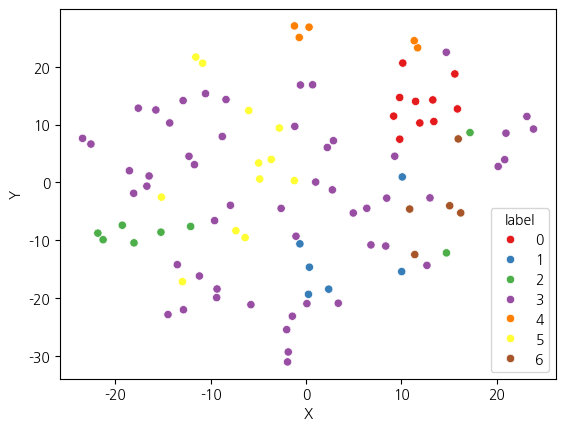

In [104]:
# 2차원 산점도로 군집 결과 시각화
sns.scatterplot(data=df_tsne, x='X', y='Y', hue='label', palette='Set1')

In [105]:
plt.text?

Signature:
plt.text(
    x: 'float',
    y: 'float',
    s: 'str',
    fontdict: 'dict[str, Any] | None' = None,
    **kwargs,
) -> 'Text'
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Retur

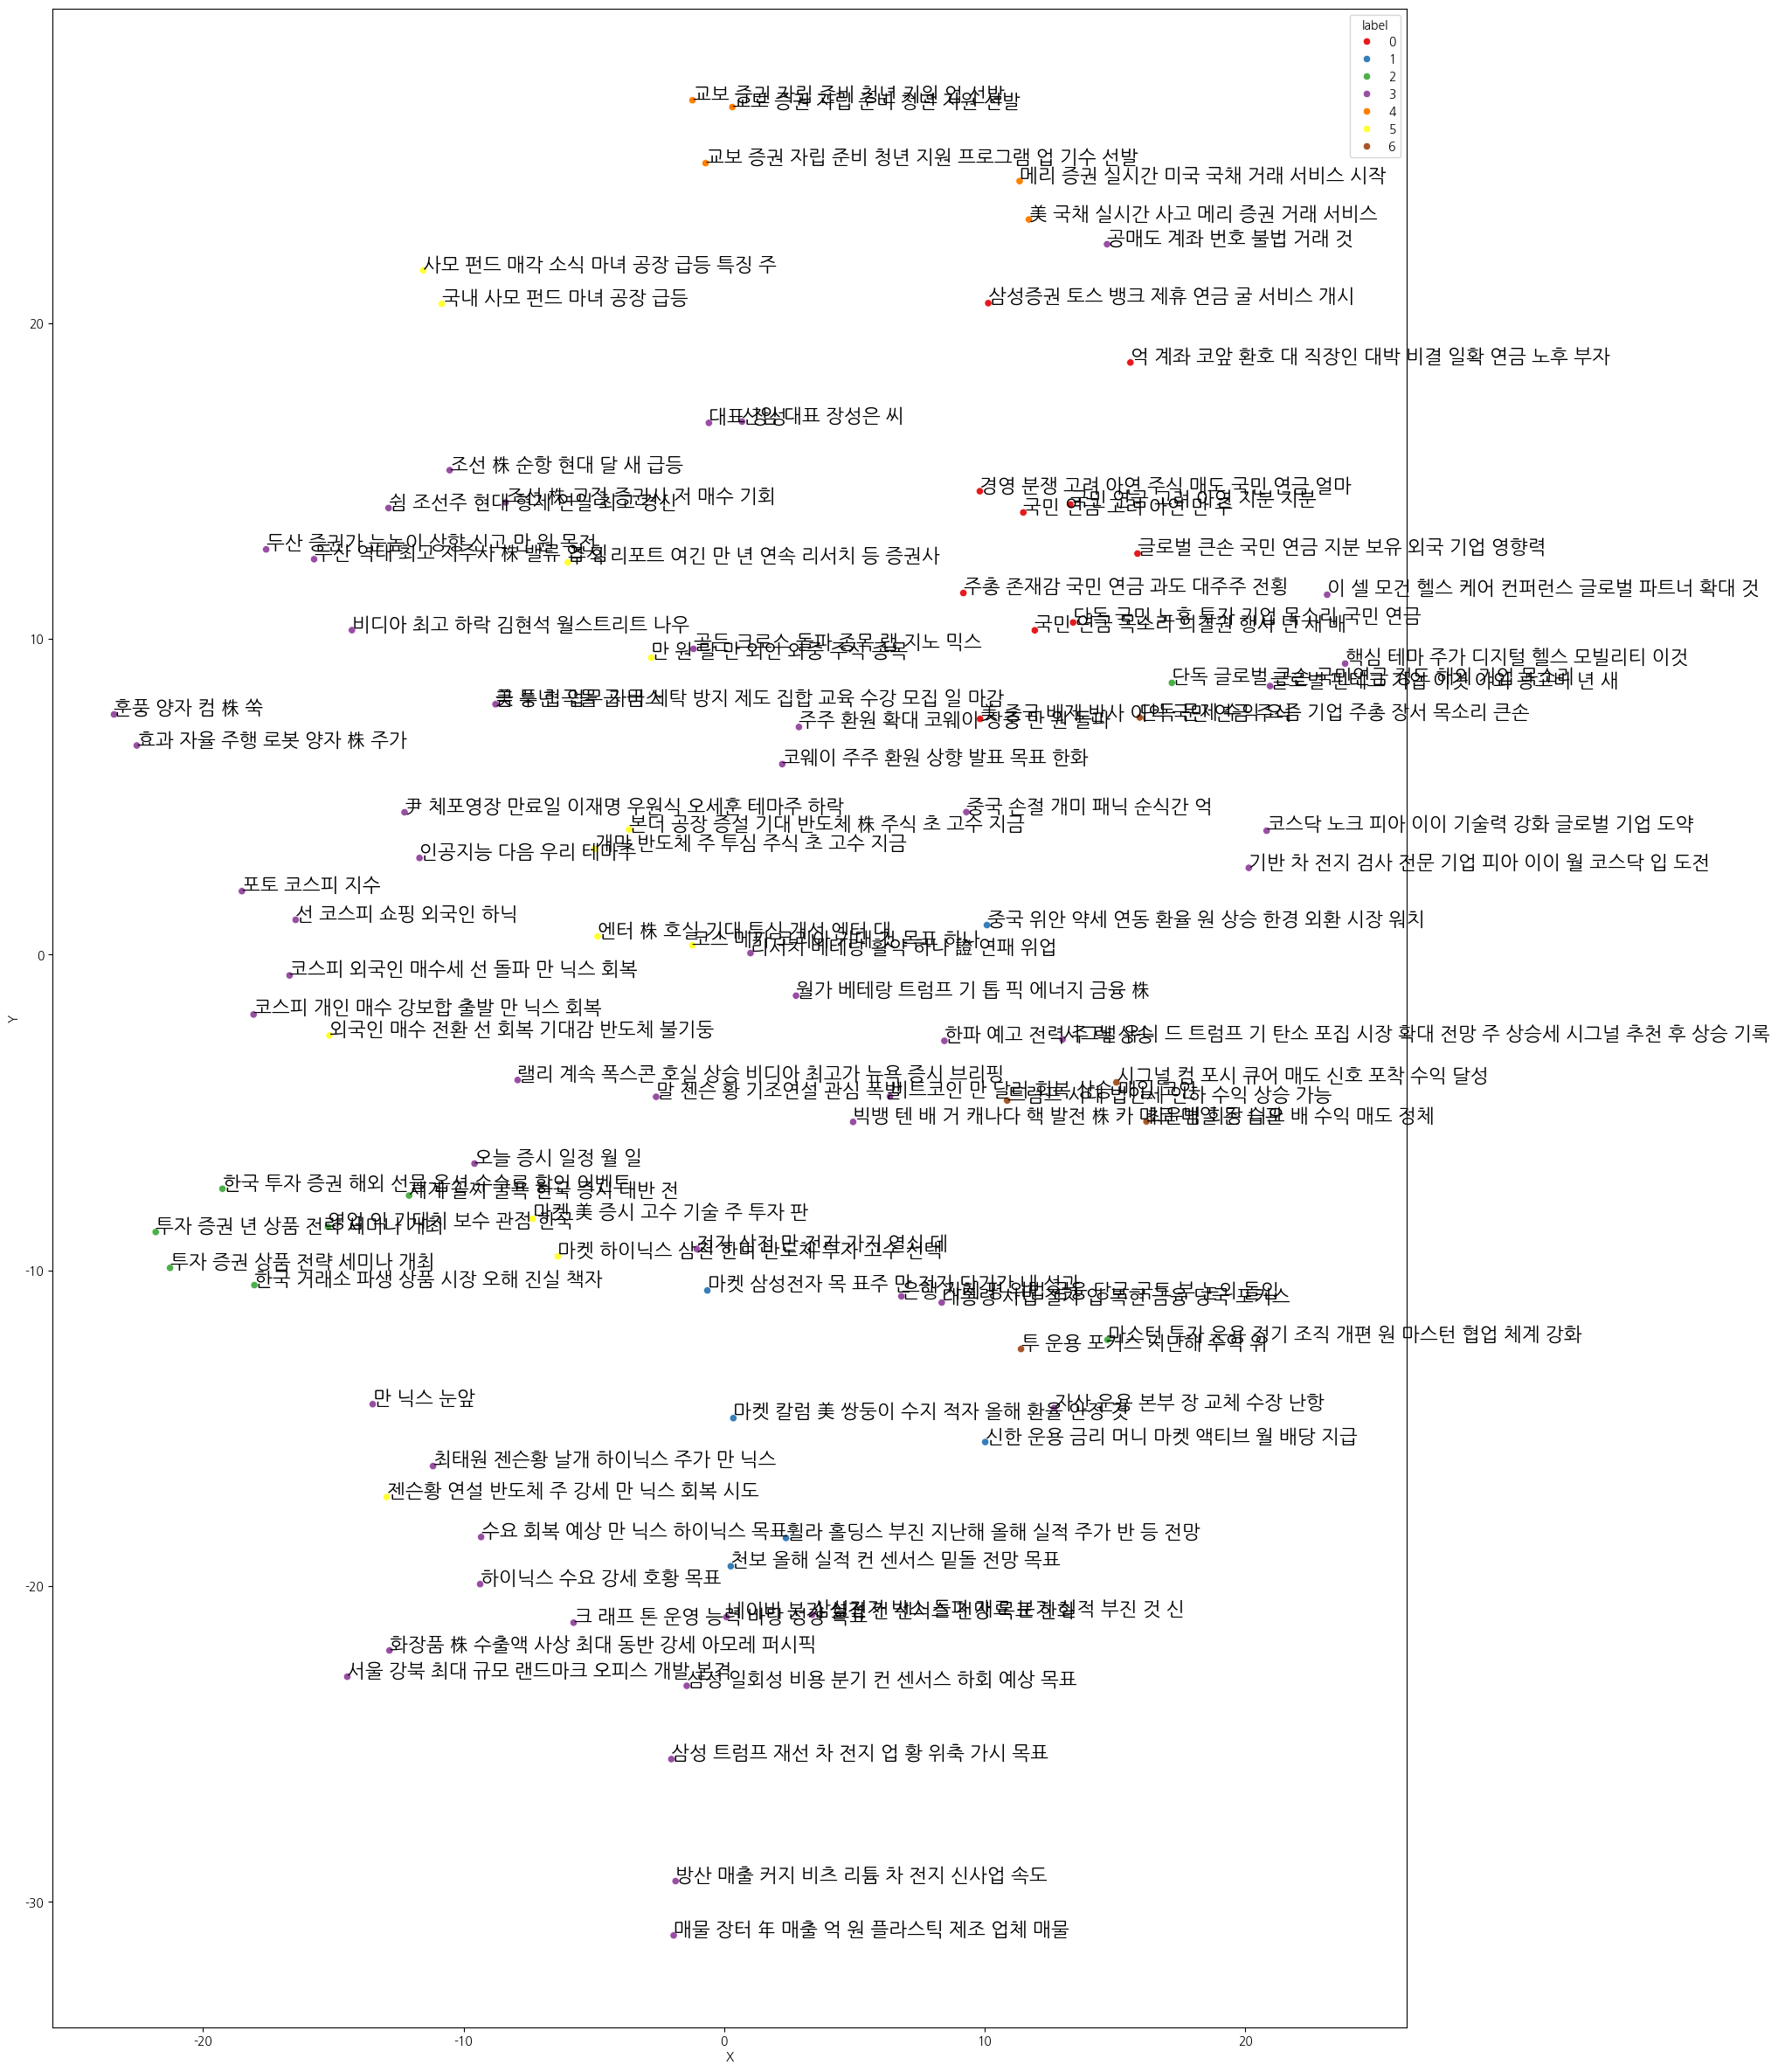

In [106]:
# 텍스트 정보 추가해서 시각화해보기
plt.figure(figsize=(20,30))
sns.scatterplot(data=df_tsne, x='X', y='Y', hue='label', palette='Set1')
for i in df_tsne.index:
    plt.text(x=df_tsne.loc[i,'X'], y=df_tsne.loc[i,'Y'], s=df_tsne.loc[i,'제목_명사'], fontsize=16)

In [107]:
# kmeans.inertia_ 의미
# 클러스터내의 데이터 포인트와 클러스터 중심 간의 거리의 제곱합
# kmeans.inertia_ 값이 낮을 수록 클러스터가 더 밀집되었다는 것을 의미하며, 클러스터링의 품질이 높다고 볼수 있다.
# kmeans.inertia_ 값을 사용하여 엘보우(Elbow Method) 기법을 적용할수 있다. 즉 급격히 감소하는 지점을 찾아 최적의 클러스터 수를 결정
kmeans.inertia_

86.8460354121529

In [108]:
from sklearn.metrics import silhouette_score
from tqdm import trange

In [109]:
# silhouette_score : 각 데이터 포인트가 얼마나 잘 클러스터링되었는지를 나타내는 지표
#                    값의 범위 -1 ~ 1 사이
#  1 : 클러스터링이 잘되었음을 의미, 다른 클러스터간의 거리가 멀다는것을 의미
#  0 : 데이터 포인터가 클러스터링의 경계에 위치하고 있음을 의미
#  -1 : 클러스터링이 잘못되었음을 의미
silhouette_score(tvect_dtm, kmeans.labels_)

0.030740099671444962

In [116]:
inertia = []
silhoutes = []
for n in trange(2,50) :
    # print(n)
    kmeans = KMeans(n_clusters=n, n_init='auto', random_state=2025)
    clusters = kmeans.fit(tvect_dtm)
    inertia.append(kmeans.inertia_)
    silhoutes.append(silhouette_score(tvect_dtm, kmeans.labels_))

100%|██████████| 48/48 [00:01<00:00, 29.07it/s]


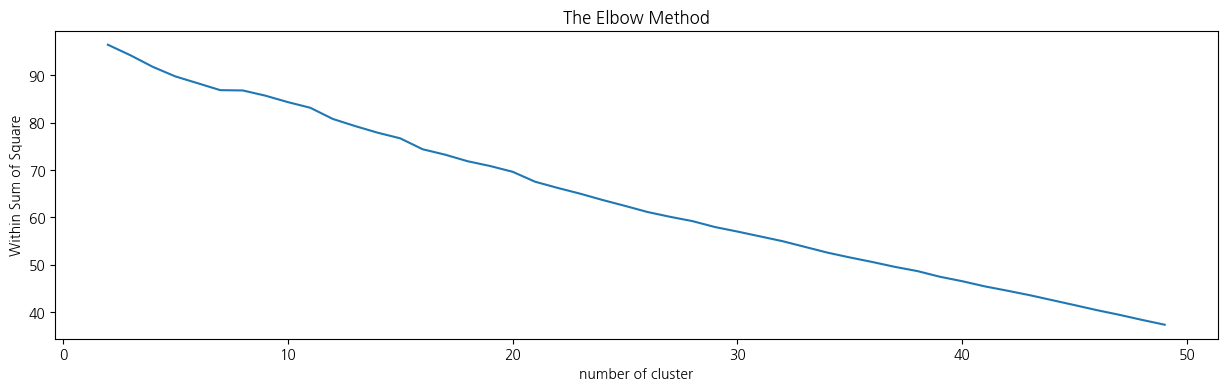

In [118]:
plt.figure(figsize=(15,4))
plt.plot(range(2,50), inertia)
plt.title("The Elbow Method")
plt.xlabel('number of cluster')
plt.ylabel('Within Sum of Square')
plt.show()